# **Tugas Praktikum**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
    - Metode pra pengolahan
    - Pemilihan fitur
    - Arsitektur ANN
    - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
    - AKURASI
    - CONFUSION MATRIX
    - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

### **Import Library**

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### **Load Datasets MNIST** 

In [72]:
mnist = datasets.fetch_openml("mnist_784")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### **Eksplorasi Data**

In [73]:
# Melihat dimensi data
n_sampel, n_dimensi = mnist.data.shape  # Mendapatkan jumlah sampel dan dimensi
n_kelas = len(np.unique(mnist.target))  # Mendapatkan jumlah kelas (unik)

print("Jumlah sampel:", n_sampel)
print("Dimensi setiap sampel:", n_dimensi)
print("Jumlah kelas:", n_kelas)

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


### **Pengambilan Data Gambar dan Label dari Dataset MNIST**

In [74]:
# Mengambil data dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [75]:
X.shape

(70000, 784)

### **Scaling Data Gambar Menggunakan Min-Max Scaler**

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Membuat objek MinMaxScaler
X_scaled = scaler.fit_transform(X)  # Melakukan penskalaan pada data X

In [77]:
# Menampilkan 5 data awal dari X_scaled
print(X_scaled[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### **Ekstraksi Fitur dengan PCA**

In [78]:
from sklearn.decomposition import PCA

n_components = 300
pca = PCA(n_components=n_components, whiten=True, random_state=42)
X_pca = pca.fit_transform(X_scaled)

### **Split Data menjadi Data Pelatihan dan Data Pengujian**

In [79]:
# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### **Membangun Model ANN**

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Membangun model ANN
model = keras.Sequential()
model.add(layers.Input(shape=X_pca.shape[1]))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Misalkan ada 10 kelas

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.2)

Epoch 1/50
448/448 [==============================] - 2s 4ms/step - loss: 0.7429 - accuracy: 0.7740 - val_loss: 0.2898 - val_accuracy: 0.9162
Epoch 2/50
448/448 [==============================] - 1s 3ms/step - loss: 0.2011 - accuracy: 0.9413 - val_loss: 0.2354 - val_accuracy: 0.9286
Epoch 3/50
448/448 [==============================] - 2s 4ms/step - loss: 0.1173 - accuracy: 0.9668 - val_loss: 0.2152 - val_accuracy: 0.9356
Epoch 4/50
448/448 [==============================] - 2s 4ms/step - loss: 0.0703 - accuracy: 0.9806 - val_loss: 0.2146 - val_accuracy: 0.9388
Epoch 5/50
448/448 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9906 - val_loss: 0.2196 - val_accuracy: 0.9418
Epoch 6/50
448/448 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9954 - val_loss: 0.2196 - val_accuracy: 0.9444
Epoch 7/50
448/448 [==============================] - 2s 6ms/step - loss: 0.0105 - accuracy: 0.9987 - val_loss: 0.2250 - val_accuracy: 0.9446
Epoch 

### **Evaluasi Performa Model pada Data Pelatihan**

In [94]:
train_lost, train_acc = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_lost: .2f}")
print(f"Train Accuracy: {train_acc: .2f}")

1750/1750 [==============================] - 3s 2ms/step - loss: 0.0928 - accuracy: 0.9902
Train Loss:  0.09
Train Accuracy:  0.99


### **Evaluasi Performa Model pada Data Pengujian**

In [96]:
test_lost, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_lost: .2f}")
print(f"Test Accuracy: {test_acc: .2f}")

438/438 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.9481
Test Loss:  0.55
Test Accuracy:  0.95


### **Visualisasi Confusion Matrix**

438/438 [==============================] - 1s 2ms/step


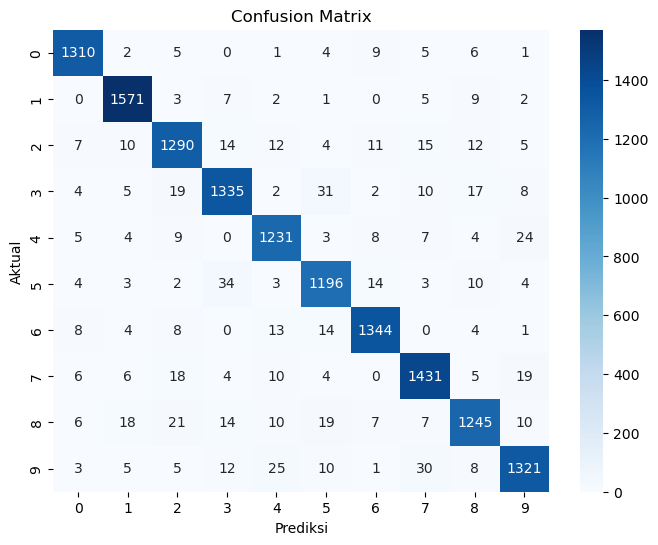

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi label pada data pengujian
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Mengambil label dengan probabilitas tertinggi

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()